## Importing Libraries

+ **Emojify Library**: https://pypi.org/project/emoji/

In [1]:
import emoji
import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     e:\rohit\python3.7\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Loading Dataset

In [2]:
training_data = pd.read_csv('train_emoji.csv', usecols=[0, 1], names=['sentences', 'labels'])
training_data

,sentences,labels
0,never talk to me again,3
1,I am proud of your achievements,2
2,It is the worst day in my life,3
3,Miss you so much,0
4,food is life,4
...,...,...
127,he had to make a home run,1
128,I am ordering food,4
129,What is wrong with you,3
130,I love you,0


In [3]:
validation_data = pd.read_csv('test_emoji.csv', usecols=[0, 1], names=['sentences', 'labels'])
validation_data

,sentences,labels
0,I want to eat\t,4
1,he did not answer\t,3
2,he got a very nice raise\t,2
3,she got me a nice present\t,2
4,ha ha ha it was so funny\t,2
5,he is a good friend\t,2
6,I am upset\t,3
7,We had such a lovely dinner tonight\t,2
8,where is the food\t,4
9,Stop making this joke ha ha ha\t,2


## Analyzing Dataset

In [4]:
training_data.isnull().sum()

sentences    0
labels       0
dtype: int64

In [5]:
validation_data.isnull().sum()

sentences    0
labels       0
dtype: int64

## Emoji Converter

In [6]:
unique_labels = training_data['labels'].unique()
unique_labels

array([3, 2, 0, 4, 1], dtype=int64)

In [7]:
emoji_dictionary = {"0": "\u2764\uFE0F",    # :heart: prints a black instead of red heart depending on the font
                    "1": ":baseball:",
                    "2": ":smile:",
                    "3": ":disappointed:",
                    "4": ":fork_and_knife:"}

In [8]:
# converts a label (int or string) into the corresponding emoji code (string) ready to be printed
def label_to_emoji(label):
    return emoji.emojize(emoji_dictionary[str(label)], use_aliases=True)

In [9]:
print('Unique labels & their corresponding emojis-')
for i in sorted(unique_labels):
    print(i, ':', label_to_emoji(i))

Unique labels & their corresponding emojis-
0 : ❤️
1 : ⚾
2 : 😄
3 : 😞
4 : 🍴


## Pre-processing the sentences

In [10]:
# creating an object of lemmatizer
lemmatizer = nltk.stem.WordNetLemmatizer()

# stopwords
stopwords = set(nltk.corpus.stopwords.words('english'))

In [11]:
def create_corpus(data):
    corpus = []

    for i in range(len(data)):
        sentence = []

        for word in data[i].split():
            processed_word = lemmatizer.lemmatize(word)

#             if processed_word not in stopwords:
#                 sentence.append(processed_word)
            sentence.append(processed_word)

        corpus.append(' '.join(sentence))
        
    return corpus

In [12]:
training_corpus, training_labels = np.array(create_corpus(training_data['sentences'])), training_data['labels'].values
training_corpus

array(['never talk to me again', 'I am proud of your achievement',
       'It is the worst day in my life', 'Miss you so much',
       'food is life', 'I love you mum', 'Stop saying bullshit',
       'congratulation on your acceptance', 'The assignment is too long',
       'I want to go play', 'she did not answer my text',
       'Your stupidity ha no limit', 'how many point did he score',
       'my algorithm performs poorly', 'I got approved',
       'Stop shouting at me', 'Sounds like a fun plan ha ha',
       'no one like him', 'the game just finished',
       'I will celebrate soon', 'So sad you are not coming',
       'She is my dearest love', 'Good job', 'It wa funny lol',
       'candy is life', 'The chicago cub won again', 'I am hungry',
       'I am so excited to see you after so long',
       'you did well on you exam', 'let brunch some day', 'he is so cute',
       'How dare you ask that', 'do you want to join me for dinner',
       'I said yes', 'she is attractive', 'you s

In [13]:
validation_corpus = np.array(create_corpus(validation_data['sentences']))
validation_labels = validation_data['labels'].values
validation_corpus[:10]

array(['I want to eat', 'he did not answer', 'he got a very nice raise',
       'she got me a nice present', 'ha ha ha it wa so funny',
       'he is a good friend', 'I am upset',
       'We had such a lovely dinner tonight', 'where is the food',
       'Stop making this joke ha ha ha'], dtype='<U37')

## Initializing Variables

In [14]:
pad_type = 'pre'
trunc_type = 'post'
embedding_dim = 100
total_epochs = 100

## Tokenization

In [15]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(
    num_words=None,
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
    lower=True,
    split=' ',
    char_level=False,
    oov_token='<OOV>'
)

tokenizer.fit_on_texts(training_corpus)

In [16]:
vocab_size = len(tokenizer.word_index)

print('Vocab-size:', vocab_size)
# words + oov_token

Vocab-size: 257


## Mapping to sequences

In [17]:
training_sequences = tokenizer.texts_to_sequences(training_corpus)
training_sequences[:10]

[[84, 85, 10, 16, 54],
 [2, 7, 55, 30, 19, 86],
 [17, 4, 5, 87, 56, 57, 11, 35],
 [36, 3, 8, 88],
 [25, 4, 35],
 [2, 20, 3, 89],
 [37, 90, 91],
 [92, 38, 19, 93],
 [5, 94, 4, 58, 59],
 [2, 21, 10, 95, 60]]

In [18]:
validation_sequences = tokenizer.texts_to_sequences(validation_corpus)
validation_sequences[:10]

[[2, 21, 10, 227],
 [14, 26, 18, 96],
 [14, 27, 6, 199, 1, 1],
 [13, 27, 16, 6, 1, 1],
 [22, 22, 22, 17, 28, 8, 32],
 [14, 4, 6, 43, 1],
 [2, 7, 1],
 [140, 78, 221, 6, 1, 69, 1],
 [240, 4, 5, 25],
 [37, 1, 15, 48, 22, 22, 22]]

## Padding sequences

In [19]:
max_length = max([len(sequence) for sequence in training_sequences])
print('Max-Length of a sequence:', max_length)

Max-Length of a sequence: 10


In [20]:
pad_training_seq = tf.keras.preprocessing.sequence.pad_sequences(training_sequences, maxlen=max_length, padding=pad_type)
pad_training_seq[:10]

array([[ 0,  0,  0,  0,  0, 84, 85, 10, 16, 54],
       [ 0,  0,  0,  0,  2,  7, 55, 30, 19, 86],
       [ 0,  0, 17,  4,  5, 87, 56, 57, 11, 35],
       [ 0,  0,  0,  0,  0,  0, 36,  3,  8, 88],
       [ 0,  0,  0,  0,  0,  0,  0, 25,  4, 35],
       [ 0,  0,  0,  0,  0,  0,  2, 20,  3, 89],
       [ 0,  0,  0,  0,  0,  0,  0, 37, 90, 91],
       [ 0,  0,  0,  0,  0,  0, 92, 38, 19, 93],
       [ 0,  0,  0,  0,  0,  5, 94,  4, 58, 59],
       [ 0,  0,  0,  0,  0,  2, 21, 10, 95, 60]])

In [21]:
pad_validation_seq = tf.keras.preprocessing.sequence.pad_sequences(
    validation_sequences,
    maxlen=max_length,
    padding=pad_type,
    truncating=trunc_type
)
pad_validation_seq[:10]

array([[  0,   0,   0,   0,   0,   0,   2,  21,  10, 227],
       [  0,   0,   0,   0,   0,   0,  14,  26,  18,  96],
       [  0,   0,   0,   0,  14,  27,   6, 199,   1,   1],
       [  0,   0,   0,   0,  13,  27,  16,   6,   1,   1],
       [  0,   0,   0,  22,  22,  22,  17,  28,   8,  32],
       [  0,   0,   0,   0,   0,  14,   4,   6,  43,   1],
       [  0,   0,   0,   0,   0,   0,   0,   2,   7,   1],
       [  0,   0,   0, 140,  78, 221,   6,   1,  69,   1],
       [  0,   0,   0,   0,   0,   0, 240,   4,   5,  25],
       [  0,   0,   0,  37,   1,  15,  48,  22,  22,  22]])

## Creating Model

In [22]:
# input_dim = (vocab_size+1) as tokenizer.word_index ranges from [1, 257]
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=(vocab_size+1), output_dim=embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=32, dropout=0.2)),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(units=len(unique_labels), activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 100)           25800     
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                34048     
_________________________________________________________________
dense (Dense)                (None, 16)                1040      
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 85        
Total params: 60,973
Trainable params: 60,973
Non-trainable params: 0
_________________________________________________________________


## Compiling Model

In [23]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])

## Training Model

In [24]:
history = model.fit(
    x=pad_training_seq,
    y=training_labels,
    epochs=total_epochs,
    shuffle=True,
    validation_data=(pad_validation_seq, validation_labels)
)

Epoch 1/100
5/5 [==============================] - 1s 245ms/step - loss: 1.6104 - acc: 0.1894 - val_loss: 1.6075 - val_acc: 0.3571
Epoch 2/100
5/5 [==============================] - 0s 20ms/step - loss: 1.6069 - acc: 0.3561 - val_loss: 1.6050 - val_acc: 0.4821
Epoch 3/100
5/5 [==============================] - 0s 22ms/step - loss: 1.6013 - acc: 0.4621 - val_loss: 1.6006 - val_acc: 0.4107
Epoch 4/100
5/5 [==============================] - 0s 55ms/step - loss: 1.5952 - acc: 0.4848 - val_loss: 1.5963 - val_acc: 0.3750
Epoch 5/100
5/5 [==============================] - 0s 18ms/step - loss: 1.5900 - acc: 0.4773 - val_loss: 1.5921 - val_acc: 0.3750
Epoch 6/100
5/5 [==============================] - 0s 19ms/step - loss: 1.5813 - acc: 0.4924 - val_loss: 1.5862 - val_acc: 0.3393
Epoch 7/100
5/5 [==============================] - 0s 25ms/step - loss: 1.5693 - acc: 0.5455 - val_loss: 1.5786 - val_acc: 0.3571
Epoch 8/100
5/5 [==============================] - 0s 26ms/step - loss: 1.5619 - acc: 0.5

5/5 [==============================] - 0s 17ms/step - loss: 0.1167 - acc: 0.9848 - val_loss: 1.9073 - val_acc: 0.5179
Epoch 64/100
5/5 [==============================] - 0s 18ms/step - loss: 0.1471 - acc: 0.9773 - val_loss: 1.9385 - val_acc: 0.5357
Epoch 65/100
5/5 [==============================] - 0s 15ms/step - loss: 0.0696 - acc: 1.0000 - val_loss: 1.9908 - val_acc: 0.5357
Epoch 66/100
5/5 [==============================] - 0s 15ms/step - loss: 0.1102 - acc: 0.9924 - val_loss: 1.9849 - val_acc: 0.5357
Epoch 67/100
5/5 [==============================] - 0s 20ms/step - loss: 0.1374 - acc: 0.9773 - val_loss: 2.0051 - val_acc: 0.5357
Epoch 68/100
5/5 [==============================] - 0s 23ms/step - loss: 0.0815 - acc: 0.9924 - val_loss: 2.0362 - val_acc: 0.5179
Epoch 69/100
5/5 [==============================] - 0s 24ms/step - loss: 0.0876 - acc: 0.9924 - val_loss: 2.0927 - val_acc: 0.5179
Epoch 70/100
5/5 [==============================] - 0s 26ms/step - loss: 0.0660 - acc: 0.9924 - 

## Visualizing Model Results

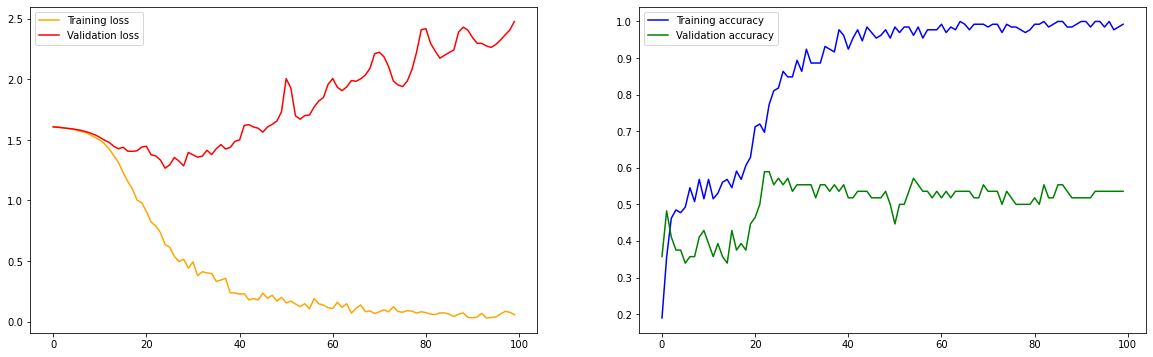

In [25]:
plt.figure(figsize=(20, 6))
plt.title('Results')

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], color='orange', label='Training loss')
plt.plot(history.history['val_loss'], color='red', label='Validation loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], color='blue', label='Training accuracy')
plt.plot(history.history['val_acc'], color='green', label='Validation accuracy')
plt.legend()

## Testing Model

In [32]:
print('Input text:')

txt = input()
test_seq = tokenizer.texts_to_sequences([txt])

pad_test_seq = tf.keras.preprocessing.sequence.pad_sequences(
    test_seq,
    maxlen=max_length,
    padding=pad_type,
    truncating=trunc_type
)

pred = np.argmax(model.predict(pad_test_seq), axis=-1)[0]
label_to_emoji(pred)

Input text:
i am too happy


'😄'